In [66]:
import pandas as pd
from pandas import DataFrame
from pandas import read_excel, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [67]:
# 폰트 설정
#plt.rcParams['font.family'] = "Malgun Gothic" # 윈도우 전용
plt.rcParams['font.family'] = "Malgun Gothic"
#글자 크기
plt.rcParams["font.size"] = 12
# 그래프 크기설정(inch)
plt.rcParams["figure.figsize"] = (15, 7)
# 유티코드에서 음수 부호 설정
plt.rcParams['axes.unicode_minus'] = False

In [68]:
csv_test = pd.read_csv('pratice.csv', encoding='euc-kr')
csv_test

,품목,등급,단량,단위,평균가
0,가죽나물(가죽나물(일반)),없음,4.0,kg,32000
1,가죽나물(가죽나물(일반)),특(1등,2.0,kg,14000
2,가죽나물(가죽나물(일반)),없음,4.0,kg,25000
3,가죽나물(가죽나물(일반)),없음,4.0,kg,25000
4,가죽나물(가죽나물(일반)),없음,4.0,kg,30000
...,...,...,...,...,...
15725,홍고추(홍청양),특(1등,10.0,kg,43500
15726,홍고추(홍청양),특(1등,11.0,kg,50000
15727,홍고추(홍청양),특(1등,13.0,kg,58000
15728,홍고추(홍청양),특(1등,4.0,kg,23000


In [69]:
csv_test.shape

(15730, 5)

In [70]:
df = csv_test.drop(['단위', '품목'], axis=1)
df

,등급,단량,평균가
0,없음,4.0,32000
1,특(1등,2.0,14000
2,없음,4.0,25000
3,없음,4.0,25000
4,없음,4.0,30000
...,...,...,...
15725,특(1등,10.0,43500
15726,특(1등,11.0,50000
15727,특(1등,13.0,58000
15728,특(1등,4.0,23000


In [71]:
df.duplicated().sum()

5840

In [72]:
df.loc[df.duplicated(), :]

,등급,단량,평균가
3,없음,4.0,25000
8,특(1등,2.0,14000
47,특(1등,10.0,33250
50,보통(3,5.0,10000
63,보통(3,5.0,10000
...,...,...,...
15720,특(1등,4.0,22000
15722,특(1등,4.0,19500
15725,특(1등,10.0,43500
15726,특(1등,11.0,50000


In [73]:
df = df.drop_duplicates()
df

,등급,단량,평균가
0,없음,4.0,32000
1,특(1등,2.0,14000
2,없음,4.0,25000
4,없음,4.0,30000
5,특(1등,4.0,35000
...,...,...,...
15721,특(1등,10.0,40571
15723,특(1등,10.0,40222
15724,특(1등,4.0,19100
15727,특(1등,13.0,58000


In [74]:
target = []
for i in df['등급']:
    if '없음' in i:
        target.append(0)
    elif '특' in i:
        target.append(1)
    elif '상' in i:
        target.append(2)
    else:
        target.append(3)
# print(target)
df['target'] = target
print(df)

                     등급    단량    평균가  target
0      없음                 4.0  32000       0
1      특(1등               2.0  14000       1
2      없음                 4.0  25000       0
4      없음                 4.0  30000       0
5      특(1등               4.0  35000       1
...                 ...   ...    ...     ...
15721  특(1등              10.0  40571       1
15723  특(1등              10.0  40222       1
15724  특(1등               4.0  19100       1
15727  특(1등              13.0  58000       1
15729  특(1등              10.0  43250       1

[9890 rows x 4 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_12828\4195458154.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = target


In [77]:
df = df.drop(['등급'], axis=1)
df

,단량,평균가,target
0,4.0,32000,0
1,2.0,14000,1
2,4.0,25000,0
4,4.0,30000,0
5,4.0,35000,1
...,...,...,...
15721,10.0,40571,1
15723,10.0,40222,1
15724,4.0,19100,1
15727,13.0,58000,1


In [78]:
from sklearn.preprocessing import StandardScaler

# 표준화란 데이터의 평균을 0, 분산과 표준편차를 1로 만들어주는 것을 말하는데요,
# 표준화를 하는 이유는 다른 통계 데이터와 비교하는 데에 있어 용이하게 하기 위함입니다.

# StandardScaler 객체 생성
scaler = StandardScaler()

# standardSacler 로 데이터 셋 변환. fit()과 transfrom() ghcnf
scaler.fit(df)
scaled = scaler.transform(df)
scaled

array([[-0.42103901,  0.48291601, -1.98489597],
       [-0.77484805, -0.13919765, -0.60769511],
       [-0.42103901,  0.24098292, -1.98489597],
       ...,
       [-0.42103901,  0.03706789, -0.60769511],
       [ 1.17110165,  1.38152464, -0.60769511],
       [ 0.6403881 ,  0.87173705, -0.60769511]])

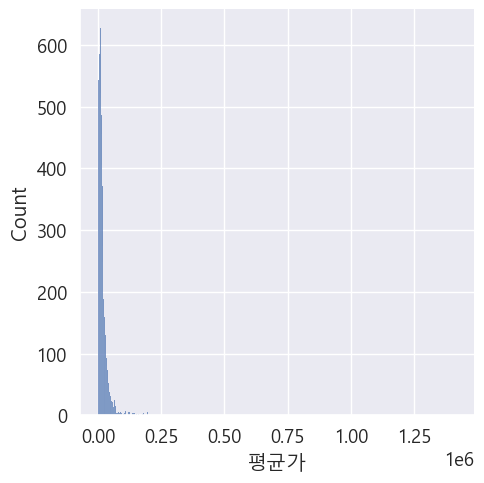

In [80]:
import seaborn as sns
sns.displot(x='평균가', kind='hist', data=df)
plt.show()